In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#import data

df = pd.read_csv('merged_cleaned.csv', names=["time", "load", "price", "biomass", "water", "offshore", "onshore", "solar", "other_renewable", "nuclear", "lignite", "coal", "gas", "pumped", "other_conv", "holiday", "date", "hour", "dayofweek", "day_name", "quarter", "month", "year", "dayofyear", "dayofmonth", "date_offset", "hour_sin", "hour_cos", "dayofweek_sin", "dayofweek_cos", "month_sin", "month_cos", "dayofyear_sin", "dayofyear_cos", "is_workday"], header=0)

#adapt column "holiday", so only 0 for Not a Holiday and 1 for any holidays is used
df["holiday"] = df["holiday"].apply(lambda x: 0 if x == "Not a Holiday" else 1)

# Convert 'time' to datetime and set as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Inspect the first few rows of the data
print(df.head())

                         load  price  biomass    water  offshore   onshore  \
time                                                                         
2018-11-01 00:00:00  48879.50  40.86  4754.75  1583.00   2721.00  11628.50   
2018-11-01 01:00:00  47312.50  41.10  4741.25  1587.50   2678.00  11029.00   
2018-11-01 02:00:00  46093.75  40.59  4733.25  1567.50   2836.75  11025.00   
2018-11-01 03:00:00  46710.50  40.09  4725.25  1550.00   2968.50  10480.25   
2018-11-01 04:00:00  47624.25  39.11  4715.00  1535.75   2765.25  10871.25   

                     solar  other_renewable  nuclear   lignite  ...  \
time                                                            ...   
2018-11-01 00:00:00    0.0           153.00   7933.0  16108.75  ...   
2018-11-01 01:00:00    0.0           153.00   7933.5  16119.00  ...   
2018-11-01 02:00:00    0.0           153.00   7927.0  16111.00  ...   
2018-11-01 03:00:00    0.0           152.50   7930.5  16134.75  ...   
2018-11-01 04:00:00    0.0 

In [3]:
# Check for the range of the data to verify the time span
print(df.index.min(), df.index.max())  # Should show range from Nov 1st, 2018 to Oct 31st, 2024

# Split the data into training and test sets (5:1 years)
train_size = int(0.83296 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]


2018-11-01 00:00:00 2024-10-30 23:00:00


In [33]:

n = len(test)
start = len(train)

In [101]:
pred = []
for t in range(start, start + n):
    # Get the value of the last timestamp (current timestamp)
    prediction = (df['load'].iloc[t-24]  + 25*df['load'].iloc[t-168] + df['load'].iloc[t-8760]) / 27.0
    pred.append(prediction)

In [68]:
pred = []
for t in range(start, start + n):
    # Get the value of the last timestamp (current timestamp)
    prediction = (df['load'].iloc[t-24]  + 2*df['load'].iloc[t-168] + df['load'].iloc[t-8760]) / 4.0
    pred.append(prediction)

In [70]:
pred = []
for t in range(start, start + n):
    # Get the value of the last timestamp (current timestamp)
    prediction = df['load'].iloc[t-168]
    pred.append(prediction)

In [102]:
errors = []

# Loop through the predictions and compare with actual values from the 'test' DataFrame
for i in range(len(pred)):
    # Get the predicted value
    predicted_value = pred[i]
    
    # Get the actual value from the 'test' DataFrame
    actual_value = test['load'].iloc[i]
    
    # Calculate the absolute percentage error for this prediction
    if actual_value != 0:  # Avoid division by zero
        error = abs((actual_value - predicted_value) / actual_value) * 100
    else:
        error = 0  # In case the actual value is zero, the error is zero (or you could handle it differently)
    
    errors.append(error)

# Calculate the MAPE by taking the mean of all the errors
mape = np.mean(errors)

# Print the MAPE
print(f'MAPE: {mape:.2f}%')

MAPE: 5.42%


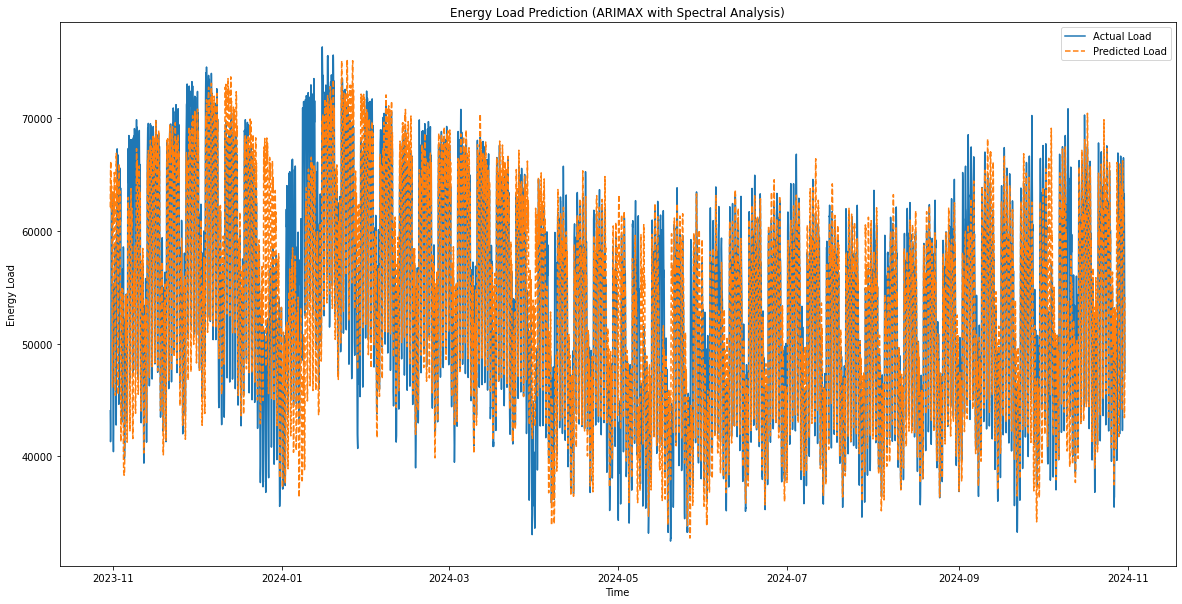

In [104]:
# Plot actual vs predicted energy load
plt.figure(figsize=(20, 10))
plt.plot(test.index, test['load'], label='Actual Load')
plt.plot(test.index, pred, label='Predicted Load', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy Load')
plt.title('Energy Load Prediction (ARIMAX with Spectral Analysis)')
plt.legend()
plt.show()

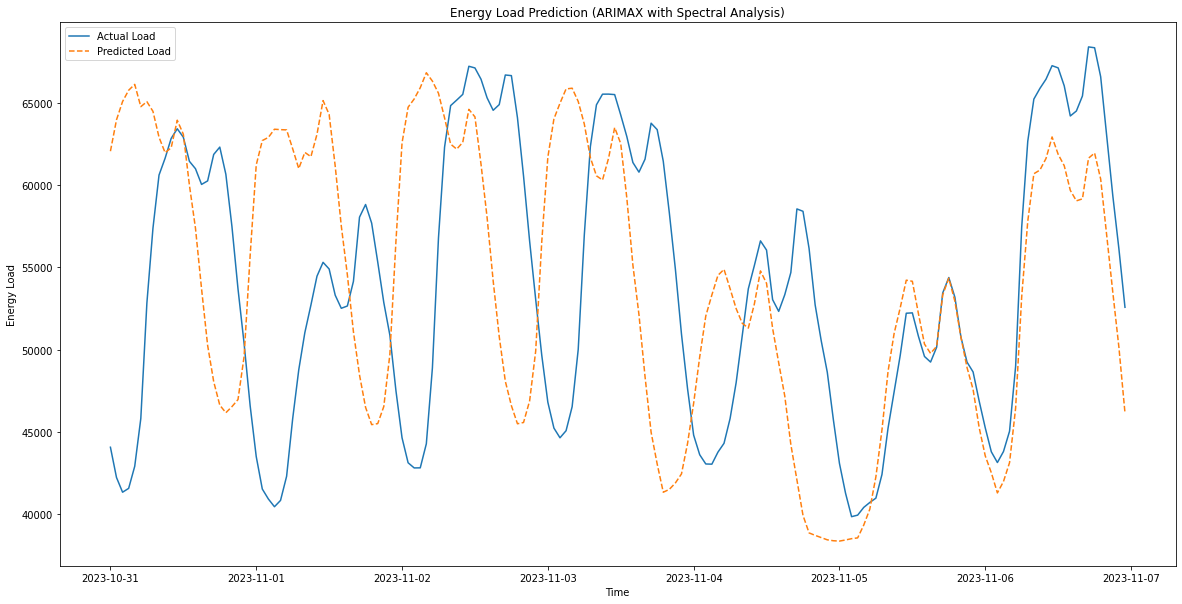

In [106]:
#Plot only one week


start = 0
end = 168

section = test.index[start:end]  # 168 hours in a week (24 hours * 7 days)

# Subset the data to the last week
y_test_section = test['load'][start:end]
forecast_section = pred[start:end]

# Plot actual vs predicted energy load for the last week
plt.figure(figsize=(20, 10))
plt.plot(section, y_test_section, label='Actual Load')
plt.plot(section, forecast_section, label='Predicted Load', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Energy Load')
plt.title('Energy Load Prediction (ARIMAX with Spectral Analysis)')
plt.legend()
plt.show()


Change of daylight-saving-time on Oct 29th 2023 might explain shift for the first days.

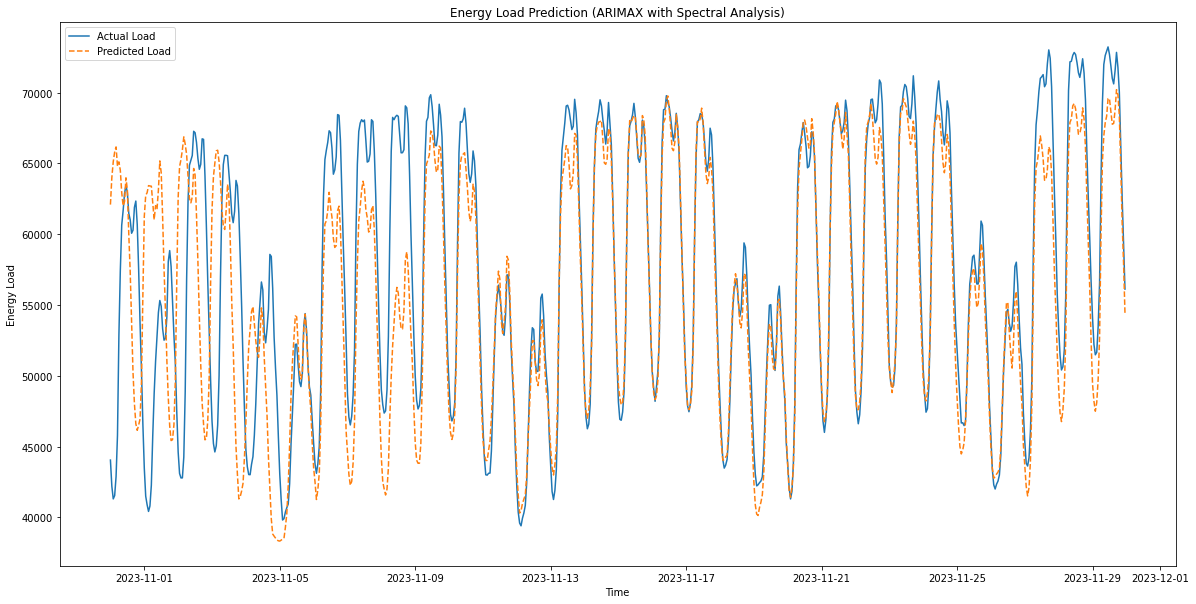

In [107]:
#Plot only one month
start = 0
end = 720

section = test.index[start:end]  # 168 hours in a week (24 hours * 7 days)

# Subset the data to the last week
y_test_section = test['load'][start:end]
forecast_section = pred[start:end]

# Plot actual vs predicted energy load for the last week
plt.figure(figsize=(20, 10))
plt.plot(section, y_test_section, label='Actual Load')
plt.plot(section, forecast_section, label='Predicted Load', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Energy Load')
plt.title('Energy Load Prediction (ARIMAX with Spectral Analysis)')
plt.legend()
plt.show()

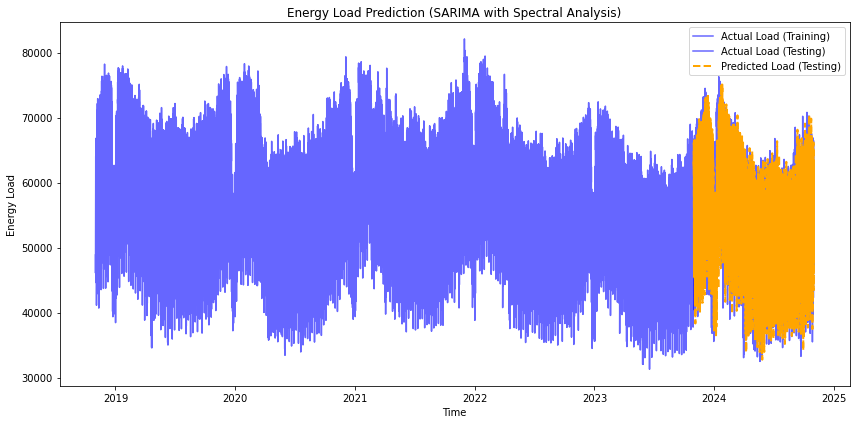

In [108]:
# Plot actual vs predicted energy load for the whole dataset (train + test) and predictions
train_size = len(train)


plt.figure(figsize=(12, 6))

# Plot the actual load for the training and testing set
plt.plot(df.index[:train_size], train['load'], label='Actual Load (Training)', color='blue', alpha=0.6)
plt.plot(df.index[train_size:], test['load'], label='Actual Load (Testing)', color='blue', alpha=0.6)

# Plot the predicted load (only for the test period)
plt.plot(test.index, pred, label='Predicted Load (Testing)', color='orange', linestyle='--', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Energy Load')
plt.title('Energy Load Prediction (SARIMA with Spectral Analysis)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Further improvements could be achieved by checking if a timestamp is within a holiday and adjusting the formula for those cases.